___
# Aula 02 - tipos de variáveis
___


**Preparo Prévio:**
1. Magalhães e Lima, Capítulo 1




___

##  Renda per capita, CO2 de países, e países sem litoral

Foram coletados dois dados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
1. Renda per capita (sendo usado PBI como uma `proxy` de renda)

Nesses *dataframes*, as linhas representam os países, as colunas representam o ano.

No *dataframe* *co2* criado a seguir, o conteúdo de cada célula é a medida de CO2 de um determinado ano (coluna) para determinado país (linha). 

No *dataframe* *income* criado a seguir, o conteúdo de cada célula é a medida de PIB per capita de um determinado ano (coluna) para um determinado país (linha). 

Também usamos as colunas *landlocked* e *region* do primeiro encontro. Neste caso não há uma coluna ano a ano porque este atributo muda só quando mudam as fronteiras de um país.


Como os arquivos estão separados, será preciso juntá-los cruzando o país.

Vamos nos restringir a analisar o ano de **2010**.

___

## Leitura dos arquivos e mudanças de índices

In [258]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [259]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')
landlocked = pd.read_excel('landlocked_region.xlsx')
fertility = pd.read_csv('children_per_woman_total_fertility.csv')

### CO2

É possível verificar que cada linha representa um país e as colunas representam o ano


In [260]:
co2.head(3)

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.03678,0.04709,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos manter apenas o ano de 2010:

In [261]:
co2_2010 = co2.loc[:, ["CO2 per capita", 2010]]
income_2010 = income.loc[:, ["GDP per capita", 2010]]

### Renda

O mesmo se aplica a renda.

Lembrando que GDP significa *gross domestic product*, ou *produto interno bruto* 

In [262]:
income_2010.head(3)

,GDP per capita,2010
0,Abkhazia,NaN
1,Afghanistan,1637.0
2,Akrotiri and Dhekelia,NaN


### Landlocked e Region

Lembrando das colunas *landlocked*, que indica se um país tem litoral ou não, e *region*, que  indica a que região pertence

In [263]:
landlocked.head()

,Country,region,landlocked
0,Albania,europe_east,0
1,Algeria,africa_north,0
2,Angola,africa_sub_saharan,0
3,Antigua and Barbuda,america_north,0
4,Argentina,america_south,0


___
### Inner Join

Vamos agora juntar as três tabelas, selecionar apenas o ano de 2010 e remover os NaNs.

Ao final vamos fazer o gráfico de dispersão das duas variáveis.

**Sugestão**: pesquise sobre a função DataFrame.join(), pode ser muito útil no futuro.

mudando o índice do *co2*:

In [264]:
co2_idx = co2_2010.set_index('CO2 per capita')

Mudando o índice do *income*: 



In [265]:
inco_idx = income_2010.set_index('GDP per capita')

Mudando o índice do *landlocked*:

In [266]:
land_idx = landlocked.set_index('Country')

Renomeando as colunas:



In [267]:
df = co2_idx.join(inco_idx, how='inner', lsuffix='_co2', rsuffix='_income')
df.head(7)

,2010_co2,2010_income
Abkhazia,NaN,NaN
Afghanistan,0.262174,1637.0
Akrotiri and Dhekelia,NaN,NaN
Albania,1.336544,9374.0
Algeria,3.480977,12494.0
American Samoa,NaN,NaN
Andorra,6.092100,38982.0


Vamos juntar a terceira tabela:

In [268]:
data = df.join(land_idx, how="inner")

Por que no exemplo acima não foi necessário usar prefixos ou sufixos?

In [269]:
data.head(7)

,2010_co2,2010_income,region,landlocked
Albania,1.336544,9374.0,europe_east,0
Algeria,3.480977,12494.0,africa_north,0
Angola,1.593918,7047.0,africa_sub_saharan,0
Antigua and Barbuda,5.786646,20567.0,america_north,0
Argentina,4.466338,15765.0,america_south,0
Armenia,1.364888,6508.0,europe_east,1
Australia,16.752301,41330.0,east_asia_pacific,0


### Explorando os índices

Indexação: vamos ver como descobrir se a Argentina é landlocked

In [270]:
data.loc["Argentina", "landlocked"]

0

In [271]:
data["landlocked"]["Argentina"] ## ?

0


#### Atividade 1 

Veja no tutorial como fazer uma seleção só com os países da América do Norte.

* Atenção: Considere como América do Norte apenas Estados Unidos, Canadá e México.



In [272]:
data.loc[["Canada", "Mexico", "United States"], :]

,2010_co2,2010_income,region,landlocked
Canada,14.672016,40773.0,america_north,0
Mexico,3.911319,15460.0,america_north,0
United States,17.502718,49373.0,america_north,0


####  Atividade 2

Qual o valor de *2010_income* que separa os $75\%$ mais ricos?  Monte um DataFrame separado só com os $80\%$ mais ricos segundo a coluna *2010_income*?  

Dica: Veja as funções [quantile](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html) e [percentile](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.percentile.html)

In [273]:
data['2010_income'].describe()

count       168.000000
mean      16898.964286
std       19264.053119
min         632.000000
25%        3327.500000
50%       10393.000000
75%       21675.500000
max      127984.000000
Name: 2010_income, dtype: float64

In [274]:
data[data['2010_income'] > data['2010_income'].quantile(0.75)]

,2010_co2,2010_income,region,landlocked
Australia,16.752301,41330.0,east_asia_pacific,0
Austria,7.969244,42861.0,europe_west,1
Bahamas,7.186250,22915.0,america_north,0
Bahrain,19.178419,40553.0,asia_west,0
Belgium,10.169529,40764.0,europe_west,0
Brunei,22.960326,70636.0,east_asia_pacific,0
Canada,14.672016,40773.0,america_north,0
Cyprus,6.983513,33747.0,europe_west,0
Denmark,8.341949,42997.0,europe_west,0
Equatorial Guinea,6.679983,34431.0,africa_sub_saharan,0


#### Atividade 3

 Use um recurso apropriado para visualizar a coluna '2010_income'. Justifique

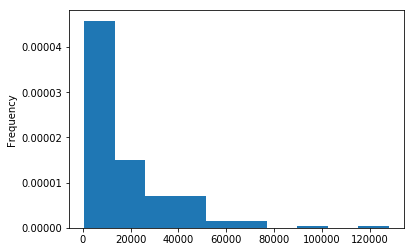

In [275]:
data['2010_income'].plot.hist(density=True);

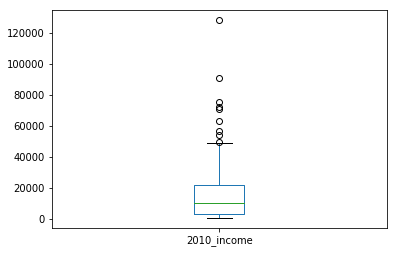

In [276]:
data['2010_income'].plot.box();

#### Atividade 4 - 2010_income

Particione a coluna *2010_income* em 10 seções. Guarde a coluna de volta no DataFrame como *2010_income_ordinal*

Dica: use `pd.cut()`

In [277]:
cortado = pd.cut(data['2010_income'],bins=10).value_counts()
cortado

(504.648, 13367.2]      98
(13367.2, 26102.4]      32
(38837.6, 51572.8]      15
(26102.4, 38837.6]      15
(64308.0, 77043.2]       3
(51572.8, 64308.0]       3
(115248.8, 127984.0]     1
(89778.4, 102513.6]      1
(102513.6, 115248.8]     0
(77043.2, 89778.4]       0
Name: 2010_income, dtype: int64

#### Atividade 4.1

 Apresente a tabela de frequência da *2010_income_ordinal*

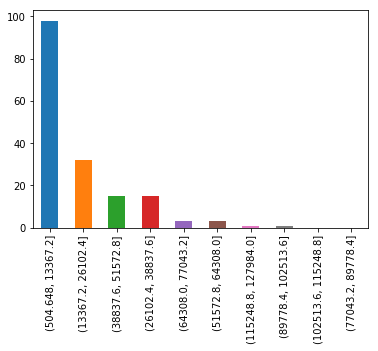

In [278]:
cortado.plot.bar()

#### Atividade 5


#### 5.1 Análise com variáveis quantitativas
Você foi encarregado de responder se a  seguinte afirmação é verdadeira ou falsa: a taxa de fertilidade é maior em regiões menos desenvolvidas do mundo.


Responda visualizando `2010_income`  versus taxa de fertilidade. Lembre-se do diagrama de dispersão visto na aula passada.

A taxa de fertilidade [pode ser encontrada no site do Gapminder](https://www.gapminder.org/data/documentation/gd008/).




In [287]:
fertilidade = fertility.set_index('geo')
fertilidade = fertilidade['2010']
fertilidade = pd.cut(fertilidade, bins=10).value_counts()
pd.crosstab(cortado, fertilidade)

""




#### 5.2 Análise com variáveis qualitativas

Adote um outro enfoque: cruze a taxa de fertilidade com o atributo de regiões


**Responda:**

Para visualizar melhor é mais útil ver a versão absoluta ou relativa da tabela cruzada? Ou seja, é mais útil que a tabela toda some 100%, ou somar 100% por região? *como se faz isso?*


É melhor que a tabela toda some 100%, por dar uma noção mais clara entre os elementos dispostos na tabela.

#### Atividade 6 - análise livre

Vá ao site [gapminder.org](https://www.gapminder.org/data/) e escolha uma variável quantitativa.


Visualize esta variável usando histograma *e* boxplot.

Classifique o comportamento desta variável em relação a assimetrias e apresente as principais medidas-resumo: média, mediana e desvio padrão

Explique o que significam as partes do boxplot


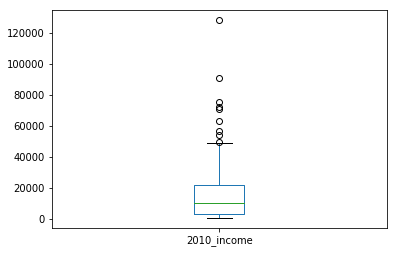

In [280]:
data.loc[:, "2010_income"].plot.box()

#### Atividade 7 - cruzamento de dados

A variável estudada na atividade anterior tem seu valor influenciado pela região ou pelo GDP per capita? Estude ambas as hipóteses